<a href="https://colab.research.google.com/github/aruaru0/whisper-speech2text-japanese-test/blob/main/Whisper_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Whisper TEST



## install package

In [1]:
# !pip install openai-whisper
!pip install git+https://github.com/openai/whisper.git

  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-yd3deumd
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-yd3deumd
  Resolved https://github.com/openai/whisper.git to commit e8622f9afc4eba139bf796c210f5c01081000472
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.7 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20230314-py3-none-any.whl size=798395 sha256=1b9ee271e1216acbe08df199ed7224fd52f7468bb02510d394047e846425cf42
  Stored in directory: /tmp/pip-ephem-wheel-cache-rrd5r4up/wheels/8b/6c/d0/622666868c179f156cf595c8b6f06f88bc5d80c4b31dccaa03
Successfully built openai-whisper


## import

In [2]:
import whisper

## model select

In [3]:
#tiny」「base」「small」「medium」「large」
model = whisper.load_model('medium')

100%|█████████████████████████████████████| 1.42G/1.42G [00:16<00:00, 93.2MiB/s]


## Speech to Text

In [4]:
result = model.transcribe('test.wav')
print(result['text'])

我が輩は猫である。名前はまだない。どこで生まれたかとんと検討がつかぬ。なんでも薄暗いじめじめしたところでにゃあにゃあ泣いていたことだけは記憶している。


## Speech to Text with translation

In [5]:
result = model.transcribe('test.wav', language="en")
print(result['text'])

 I am a cat. I don't have a name yet. I don't know where I was born. I only remember crying in a place where everything was so dark and damp.


## etc.

### mel spectrogram

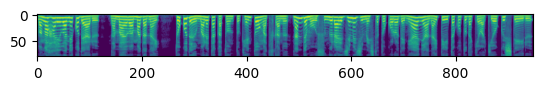

In [6]:
import matplotlib.pyplot as plt

audio = whisper.load_audio("test.wav")
mel = whisper.log_mel_spectrogram(audio)
plt.imshow(mel)

### detect language

In [7]:
# load audio and pad/trim it to fit 30 seconds
audio = whisper.pad_or_trim(audio)
mel = whisper.log_mel_spectrogram(audio).to(model.device)
_, probs = model.detect_language(mel.to(model.device))
print(f"Detected language: {max(probs, key=probs.get)}")

Detected language: ja


### input binary data

In [8]:
# 音声ファイル読み込み
import librosa
speech, sr = librosa.core.load("test.wav")
speech.shape, sr

((209408,), 22050)

In [9]:
# 推論と表示
result = model.transcribe(speech)
print(result['text'])

わがはいは猫である 名前はまだないどこで生まれたかとんと 検討がつかぬなんでも薄暗いじめじめしたところでにゃあにゃあ泣いていたことだけは 記憶している


In [10]:
speech, sr = librosa.core.load("test.wav", sr =16000)
print(sr)
result = model.transcribe(speech)
print(result['text'])

16000
我が輩は猫である。名前はまだない。どこで生まれたかとんと検討がつかぬ。なんでも薄暗いじめじめしたところでにゃあにゃあ泣いていたことだけは記憶している。
